In [2]:
%matplotlib inline
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import defaultdict

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.metrics import fbeta_score, precision_score, make_scorer, average_precision_score
from sklearn.neural_network import MLPClassifier
import cv2
import warnings

In [2]:
df = pd.read_csv('/Users/theisenm/Downloads/train.csv')
df.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [3]:
labels = df['tags'].apply(lambda x: x.split(' '))
counts = defaultdict(int)
for labelline in labels:
    for l in labelline:
        counts[l] += 1

In [4]:
print counts.keys()

['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging']


In [5]:
print counts.values()

[209, 28203, 332, 37840, 2330, 100, 7262, 2695, 4547, 7251, 339, 3662, 859, 101, 12338, 8076, 340]


([<matplotlib.axis.XTick at 0x110a93590>,
 <a list of 17 Text xticklabel objects>)

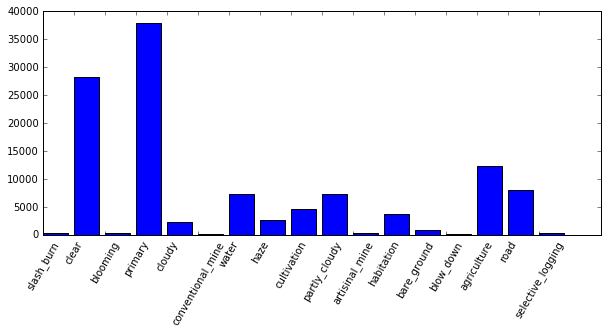

In [6]:
plt.figure(figsize=(10, 4))  # width:20, height:3
plt.bar(range(len(counts)), counts.values(), align='edge', width=0.8)
plt.xticks(range(len(counts)), counts.keys(), rotation=60)

In [21]:
count = 0
occ = defaultdict(int)
for labelline in labels:
    for l in labelline:
        count += 1
        l = count
        occ[l] += 1
    count = 0

In [22]:
print occ.keys()
print occ.values()

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[40479, 38511, 19287, 12027, 4850, 1149, 153, 26, 2]


([<matplotlib.axis.XTick at 0x111392610>,
 <a list of 9 Text xticklabel objects>)

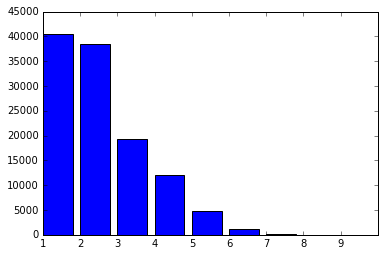

In [10]:
plt.bar(range(len(occ)), occ.values())
plt.xticks(range(len(occ)), occ.keys())

In [5]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)

for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0.0
        cy = 0.0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: 
                    cy += 1        
        com[i, i2] = (cy / c)

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
py.iplot(data, filename='train-com')

In [6]:
def load_image(path):
    image = Image.open(path)
    image.show()
    print image.size #Get the width and hight of the image for iterating over
    rgb_data = np.array(image.getdata())

    # extract the different bands
    r, g, b = rgb_data[:,0], rgb_data[:,1], rgb_data[:,2]
    return r,g,b

In [7]:
def plot_rgbn_histo(r, g, b):
    for slice_, name, color in ((r,'r', 'red'),(g,'g', 'green'),(b,'b', 'blue')):
        plt.hist(slice_.ravel(), bins=50, 
                 range=[0,255], 
                 label=name, color=color, histtype='step')
    plt.legend()

(256, 256)


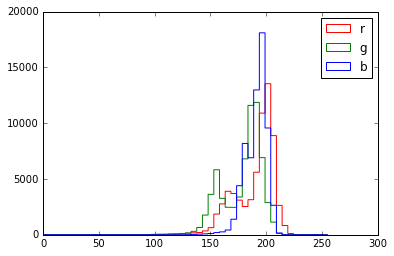

In [14]:
r1,g1,b1 = load_image('train-jpg/train_1.jpg')
plot_rgbn_histo(r1,g1,b1)

(256, 256)


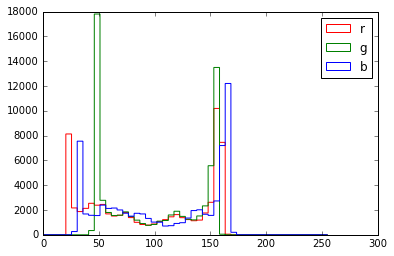

In [15]:
r12,g12,b12 = load_image('train-jpg/train_12.jpg')    
plot_rgbn_histo(r12,g12,b12)

(256, 256)


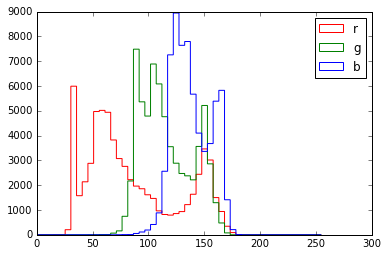

In [16]:
r24,g24,b24 = load_image('train-jpg/train_24.jpg')    
plot_rgbn_histo(r24,g24,b24)

In [17]:
bla = (np.array([1, 0, 1]) + np.array([0, 0, 1]) + np.array([1, 1, 1]))
print bla/2

[1 0 1]
